In [1]:
using SparseArrays
using MatrixProductBP, MatrixProductBP.Models
using UnPack, Graphs, IndexedGraphs, Plots, Statistics, ProgressMeter, Random
ProgressMeter.ijulia_behavior(:clear)
using JLD2
import Measurements: value

The following code compares the result of MPBP applied to a homogeneous SIS model (i.e. with constant infection and recovery rates) and to a heterogeneous SIS model, but with infection and recovery rates all set to be equal.

In [2]:
T = 100
N = 30
seed = 1

c = 4
gg = erdos_renyi(N, c/N; seed)
g = IndexedGraph(gg)

λ_unif = 0.15
ρ_unif = 0.12
λ = zeros(N,N)
for i in CartesianIndices(λ)
    if !iszero(g.A[i])
        λ[i] = λ_unif
    end
end
λ = sparse(λ)
ρ = fill(ρ_unif,N)
γ = 0.13

sis_u = SIS(g, λ_unif, ρ_unif, T; γ)
sis_h = SIS_heterogeneous(λ, ρ, T; γ);

In [3]:
bp_u = mpbp(sis_u)
bp_h = mpbp(sis_h);

In [4]:
svd_trunc = TruncBond(3)
iters_u, cb_u = iterate!(bp_u, maxiter=200; svd_trunc, tol=1e-12)
b_bp_u = beliefs(bp_u)
p_bp_u = [[bᵗ[INFECTIOUS] for bᵗ in bb] for bb in b_bp_u];

Running MPBP: iter 2    Time: 0:00:44

Running MPBP: iter 3    Time: 0:00:47

Running MPBP: iter 4    Time: 0:00:49

Running MPBP: iter 5    Time: 0:00:51

Running MPBP: iter 6    Time: 0:00:53

Running MPBP: iter 7    Time: 0:00:55

Running MPBP: iter 8    Time: 0:00:57

Running MPBP: iter 9    Time: 0:01:00

Running MPBP: iter 10    Time: 0:01:02

Running MPBP: iter 11    Time: 0:01:04

Running MPBP: iter 12    Time: 0:01:06

Running MPBP: iter 13    Time: 0:01:08

Running MPBP: iter 14    Time: 0:01:10

Running MPBP: iter 15    Time: 0:01:12

Running MPBP: iter 16    Time: 0:01:14

Running MPBP: iter 17    Time: 0:01:17

Running MPBP: iter 18    Time: 0:01:19

Running MPBP: iter 19    Time: 0:01:21

Running MPBP: iter 20    Time: 0:01:23

Running MPBP: iter 21    Time: 0:01:25

Running MPBP: iter 22    Time: 0:01:27

Running MPBP: iter 23    Time: 0:01:29

Running MPBP: iter 24    Time: 0:01:31

Running MPBP: iter 25    Time: 0:01:34

Running MPBP: iter 26    Time: 0:01:36

Running 

In [5]:
svd_trunc = TruncBond(3)
iters_h, cb_h = iterate!(bp_h, maxiter=200; svd_trunc, tol=1e-12)
b_bp_h = beliefs(bp_h)
p_bp_h = [[bᵗ[INFECTIOUS] for bᵗ in bb] for bb in b_bp_h];

Running MPBP: iter 2    Time: 0:00:06

Running MPBP: iter 3    Time: 0:00:08

Running MPBP: iter 4    Time: 0:00:10

Running MPBP: iter 5    Time: 0:00:13

Running MPBP: iter 6    Time: 0:00:15

Running MPBP: iter 7    Time: 0:00:17

Running MPBP: iter 8    Time: 0:00:20

Running MPBP: iter 9    Time: 0:00:22

Running MPBP: iter 10    Time: 0:00:24

Running MPBP: iter 11    Time: 0:00:26

Running MPBP: iter 12    Time: 0:00:29

Running MPBP: iter 13    Time: 0:00:31

Running MPBP: iter 14    Time: 0:00:33

Running MPBP: iter 15    Time: 0:00:35

Running MPBP: iter 16    Time: 0:00:38

Running MPBP: iter 17    Time: 0:00:40

Running MPBP: iter 18    Time: 0:00:42

Running MPBP: iter 19    Time: 0:00:44

Running MPBP: iter 20    Time: 0:00:47

Running MPBP: iter 21    Time: 0:00:49

Running MPBP: iter 22    Time: 0:00:52

Running MPBP: iter 23    Time: 0:00:54

Running MPBP: iter 24    Time: 0:00:56

Running MPBP: iter 25    Time: 0:00:59

Running MPBP: iter 26    Time: 0:01:01

Running 

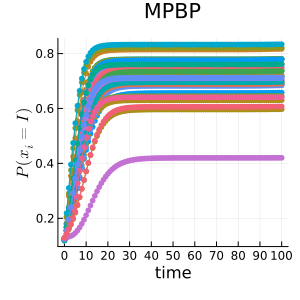

In [6]:
pl_bp_u = plot(xlabel="time", ylabel="\$P(x_i=I)\$", xticks=0:10:T, title="MPBP")
for i in 1:N
    plot!(pl_bp_u, 0:T, p_bp_u[i], label="i=$i", m=:o, ms=3, lw=1, markerstrokecolor=:auto)
end
plot(pl_bp_u, legend=false, size=(300,300))

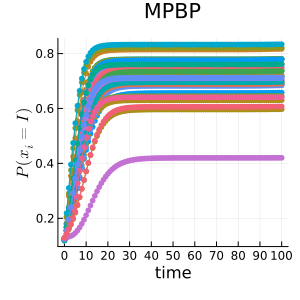

In [7]:
pl_bp_h = plot(xlabel="time", ylabel="\$P(x_i=I)\$", xticks=0:10:T, title="MPBP")
for i in 1:N
    plot!(pl_bp_h, 0:T, p_bp_h[i], label="i=$i", m=:o, ms=3, lw=1, markerstrokecolor=:auto)
end
plot(pl_bp_h, legend=false, size=(300,300))

In [8]:
err = maximum([(p_bp_h[i][j]-p_bp_u[i][j])/p_bp_u[i][j] for i in eachindex(p_bp_u) for j in eachindex(p_bp_u[i])])

0.0